FRIEDMAN_MSE
2 TRAIN:  0.4674179438583881 TEST:  0.48383294905739205
FRIEDMAN_MSE
3 TRAIN:  0.5807283998304209 TEST:  0.6130735309113533
FRIEDMAN_MSE
4 TRAIN:  0.6631434838587642 TEST:  0.6933610162385204
FRIEDMAN_MSE
5 TRAIN:  0.6990314429817158 TEST:  0.7252158286460687
FRIEDMAN_MSE
6 TRAIN:  0.728662336992281 TEST:  0.7511519789619673
FRIEDMAN_MSE
7 TRAIN:  0.7482713268785317 TEST:  0.7500247501547503
FRIEDMAN_MSE
8 TRAIN:  0.7660744124189285 TEST:  0.7455093006590563
FRIEDMAN_MSE
9 TRAIN:  0.778164116620786 TEST:  0.7372341982264763
FRIEDMAN_MSE
10 TRAIN:  0.7871830296317326 TEST:  0.7450579017681325
FRIEDMAN_MSE
11 TRAIN:  0.7960762689135376 TEST:  0.7464370092874371
FRIEDMAN_MSE
12 TRAIN:  0.8044655523528675 TEST:  0.7577279658850451
FRIEDMAN_MSE
13 TRAIN:  0.8123295993408204 TEST:  0.7694428196579289
FRIEDMAN_MSE
14 TRAIN:  0.818697105058756 TEST:  0.7736290840031409
FRIEDMAN_MSE
15 TRAIN:  0.8246918808606929 TEST:  0.7788097949963527
FRIEDMAN_MSE
16 TRAIN:  0.83023254980344 TES

'"\nBaggingClassifier\no\nAdaBoostClassifier\n\nbagging riduce varianza\nboosting riduce Bias\n\nControllare inoltre overfitting underfitting in base al numero di stimatori usati / numero massimo di foglie ecc ecc\n\nRandomForestClassifier\nteoricmanete usa bagging e boosting in automatico rispetto al decision tree\nC\'e anche random forest regressor (foglio 8)\'\n'

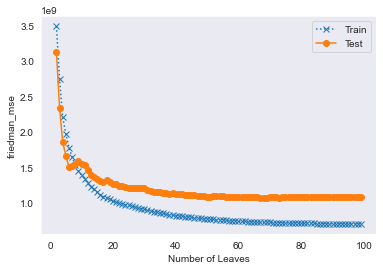

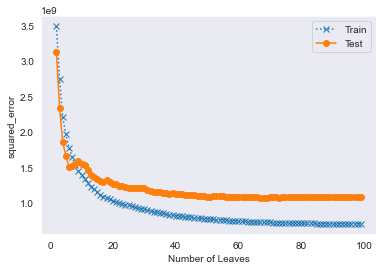

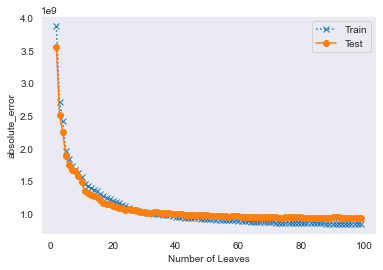

In [11]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
X_train = pd.read_csv('x_train_preprocessed.csv')
X_test = pd.read_csv('x_test_preprocessed.csv')
y_train = pd.read_csv('y_train_preprocessed.csv')
y_test = pd.read_csv('y_test_preprocessed.csv')

#Notiamo che il modello da un output migliore quando utilizziamo il parametro
# max_leaves a 59
#Inoltre notiamo che raggiunge diciamo un valore medio di 0.75utilizzando parametro 10 come massimo
#X_train.drop(columns=['Neighborhood_Score'], inplace=True)
#X_test.drop(columns=['Neighborhood_Score'], inplace=True)


dt_try = DecisionTreeRegressor()
criterions = ['friedman_mse', 'squared_error', 'absolute_error']

for crit in criterions:
    errors = []
    for max_leaves in range(2,100):
        print(crit.upper())
        dt_model = DecisionTreeRegressor(max_leaf_nodes=max_leaves, max_depth=10, min_samples_leaf=15, splitter='best', criterion=crit, max_features='auto')
        #Posso anche modificare max depth
        dt_model.fit(X_train,y_train)
        # compute Accuracy
        print(max_leaves,"TRAIN: ", dt_model.score(X_train, y_train), "TEST: ", dt_model.score(X_test,y_test))


        train_acc = mean_squared_error(y_true=y_train, y_pred=dt_model.predict(X_train))
        test_acc  = mean_squared_error(y_true=y_test,  y_pred=dt_model.predict(X_test))

        errors += [ [max_leaves, train_acc, test_acc] ]

    errors = np.array(errors)

    fig, ax = plt.subplots()
    ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
    ax.plot(errors[:,0], errors[:,2], "o-", label="Test")
    ax.set_ylabel(crit)
    ax.set_xlabel("Number of Leaves")
    ax.grid()
    ax.legend()

#Possiamo notare come la rimozione della feature Neighborhood score va a diminuire la precisione dell'algoritmo che inoltre deve andare "piu in profondità per migliorare"




## What do we need to build an Ensemble ?
""""
BaggingClassifier
o
AdaBoostClassifier

bagging riduce varianza
boosting riduce Bias

Controllare inoltre overfitting underfitting in base al numero di stimatori usati / numero massimo di foglie ecc ecc

RandomForestClassifier
teoricmanete usa bagging e boosting in automatico rispetto al decision tree
C'e anche random forest regressor (foglio 8)'
"""

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={"splitter":["best","random"],
            "max_depth" : [None,1,3,5,7,9,11,12],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5],
            "max_features":['auto','log2','sqrt',None],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

# calculating different regression metrics
reg_decision_model=DecisionTreeRegressor()
reg_decision_model.fit(X_train,y_train)

tuning_model=GridSearchCV(
reg_decision_model,param_grid=parameters,
    scoring='r2'
    ,cv=5,
    verbose=2,n_jobs= -1)
# function for calculating how much time take for hyperparameter tuning

tuning_model.fit(X_train,y_train)
print(tuning_model.best_params_)
print(tuning_model.best_score_)

In [10]:
from sklearn.model_selection import GridSearchCV
parameters={"criterion":["absolute_error"],
            "splitter":["best"],
            "max_depth" : range(1,13),
            "min_samples_leaf":range(1,16),
            "max_features":['auto'],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
            }

# calculating different regression metrics
reg_decision_model=DecisionTreeRegressor()
reg_decision_model.fit(X_train,y_train)

tuning_model=GridSearchCV(
    reg_decision_model,param_grid=parameters,
    scoring='r2'
    ,cv=2,
    verbose=2,n_jobs= -1)
# function for calculating how much time take for hyperparameter tuning

tuning_model.fit(X_train,y_train)
print(tuning_model.best_params_)
print(tuning_model.best_score_)

Fitting 2 folds for each of 1800 candidates, totalling 3600 fits
{'criterion': 'absolute_error', 'max_depth': 9, 'max_features': 'auto', 'max_leaf_nodes': 80, 'min_samples_leaf': 11, 'splitter': 'best'}
0.8038270142674202


In [12]:
#{'criterion': 'absolute_error', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 30, 'min_samples_leaf': 2, 'splitter': 'best'}
dt = DecisionTreeRegressor(criterion='friedman_mse' ,max_depth = 8, min_samples_leaf = 2,
splitter='best',max_features= 'auto', max_leaf_nodes= 80)
dt.fit(X_train,y_train)
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))
print(dt.get_params())

""""
Let’s say you have hundreds of features, then “best” splitter would be ideal because it will calculate the best features to split based on the impurity measure and use that to split the nodes, whereas if you choose “random” you have a high chance of ending up with features that don’t really give you that much information, which would lead to a more deeper less precise tree.
"""

0.9414287113015071
0.8231626871560966
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 80, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


'"\nLet’s say you have hundreds of features, then “best” splitter would be ideal because it will calculate the best features to split based on the impurity measure and use that to split the nodes, whereas if you choose “random” you have a high chance of ending up with features that don’t really give you that much information, which would lead to a more deeper less precise tree.\n'

In [ ]:
tuning_model.cv_results_['mean_test_score'][tuning_model.best_index_]

In [14]:
from sklearn.tree import DecisionTreeRegressor

X_train = pd.read_csv('x_train_preprocessed.csv')
X_test = pd.read_csv('x_test_preprocessed.csv')
y_train = pd.read_csv('y_train_preprocessed.csv')
y_test = pd.read_csv('y_test_preprocessed.csv')

errors = []
for n in range(25,51): #44-45 best one 43 TRAIN:  0.8609038365761572 TEST:  0.8278392417863291
                        #43 TRAIN:  0.8609038365761572 TEST:  0.8278392417863291
    dt_model = DecisionTreeRegressor(max_leaf_nodes=80, max_depth=9, min_samples_leaf=11, splitter='best', criterion='absolute_error', max_features='auto', ccp_alpha=30.779753761969904)
    #Posso anche modificare max depth
    dt_model.fit(X_train,y_train)
    # compute Accuracy
    print(n, "TRAIN: ", dt_model.score(X_train, y_train), "TEST: ", dt_model.score(X_test,y_test))

25 TRAIN:  0.8762970113093334 TEST:  0.8458756793853948
26 TRAIN:  0.8762970113093334 TEST:  0.8458756793853948
27 TRAIN:  0.8762970113093334 TEST:  0.8458756793853948
28 TRAIN:  0.8762970113093334 TEST:  0.8458756793853948


KeyboardInterrupt: 

Non notiamo ulteriori miglioramenti utilizzando ccp_alpha, dato che abbiamo gia limitato l'overfitting con i parametri max_depth e min_samples_leaf